In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

 ### EDA

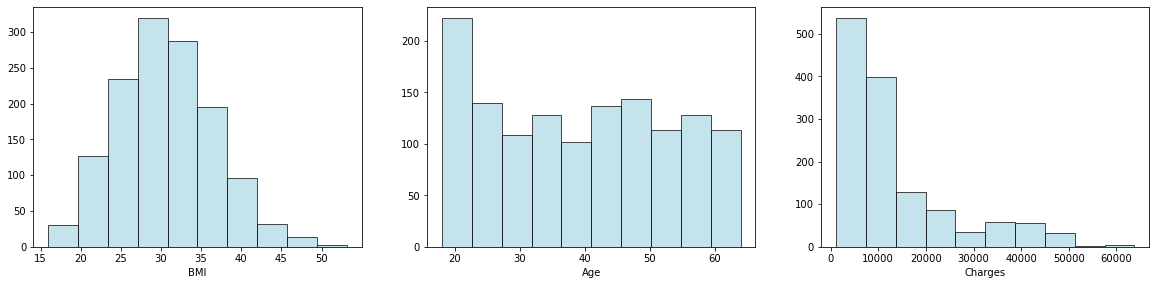

In [21]:
# Plots to check the distribution of the continuous features

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi,color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('BMI')

plt.subplot(3,3,2)
plt.hist(df.age,color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('Age')

plt.subplot(3,3,3)
plt.hist(df.charges,color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('Charges')

plt.show()

In [19]:
skewness = pd.DataFrame({'Skewness':[stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},index=['bmi','age','charges'])
skewness  #bmi little skewed, Age is uniformly distributed hence hardly any skewness, charges is highly skewed

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


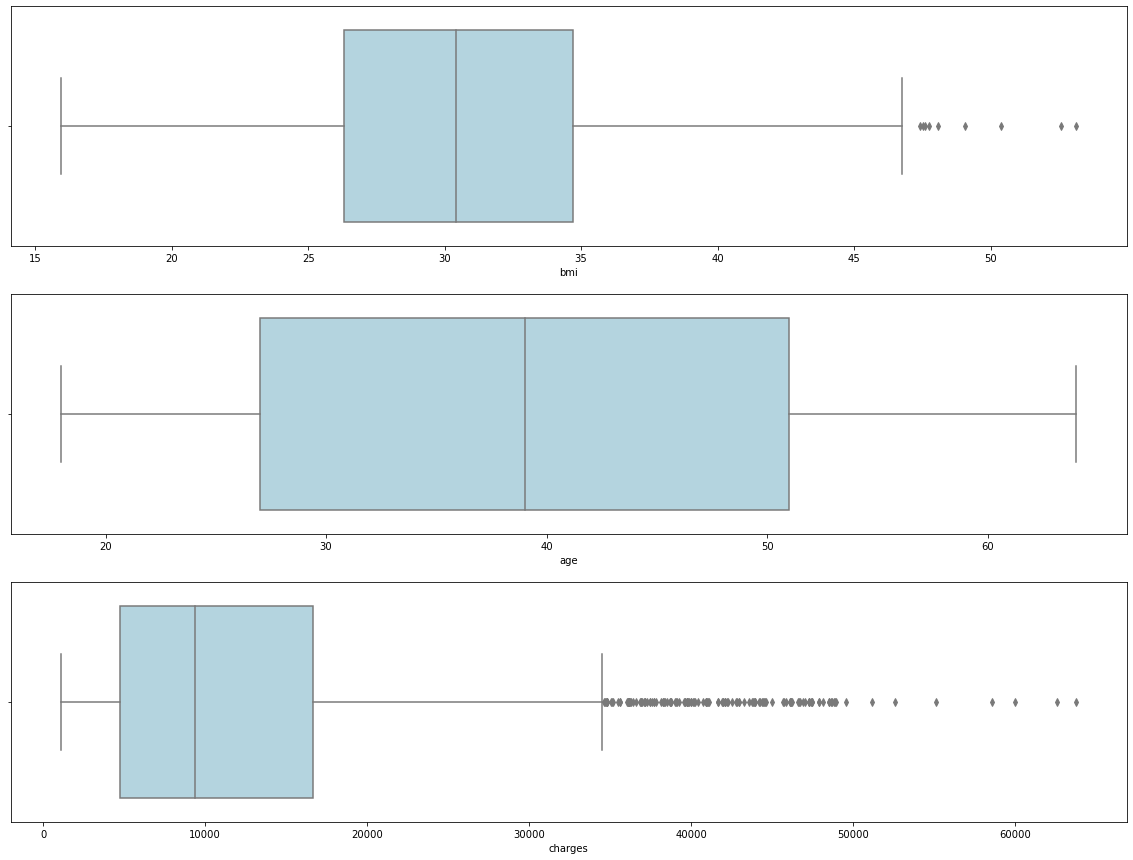

In [22]:
plt.figure(figsize=(20,15))  #bmi has few extreme values, charges as it is highly skewed it has lot of outliers
plt.subplot(3,1,1)
sns.boxplot(x=df.bmi,color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x=df.age,color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x=df.charges,color='lightblue')
plt.show()

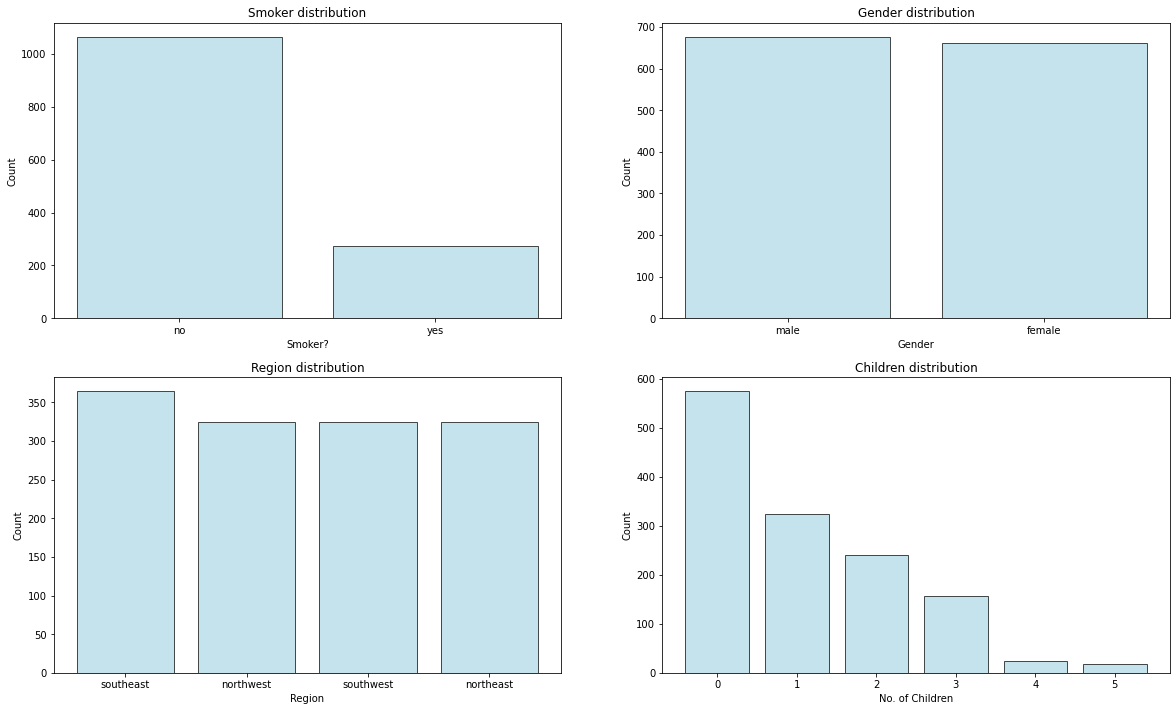

In [30]:
plt.figure(figsize=(20,25))

x= df.smoker.value_counts().index
y = [df['smoker'].value_counts()[i] for i in x]

plt.subplot(4,2,1)
plt.bar(x,y,align='center',color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.title('Smoker distribution')

x1= df.sex.value_counts().index
y1 = [df['sex'].value_counts()[j] for j in x1]

plt.subplot(4,2,2)
plt.bar(x1,y1,align='center',color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2= df.region.value_counts().index
y2 = [df['region'].value_counts()[k] for k in x2]

plt.subplot(4,2,3)
plt.bar(x2,y2,align='center',color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region distribution')

x3= df.children.value_counts().index
y3 = [df['children'].value_counts()[l] for l in x3]

plt.subplot(4,2,4)
plt.bar(x3,y3,align='center',color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('No. of Children')
plt.ylabel('Count')
plt.title('Children distribution')

plt.show()

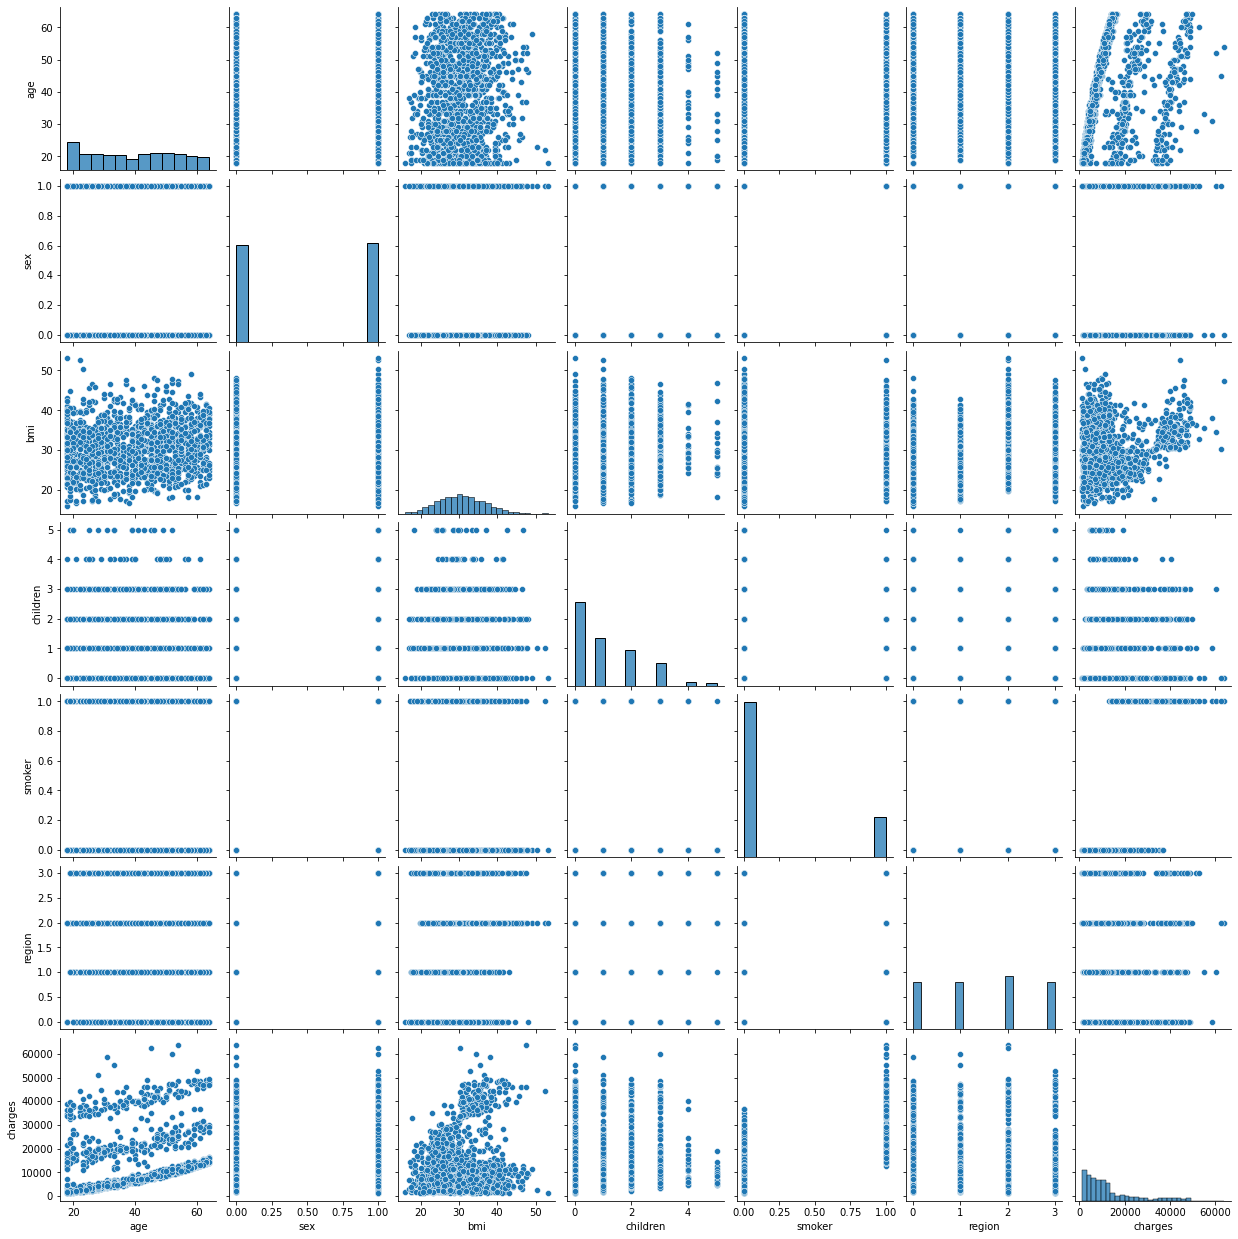

In [33]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex','smoker','region']] = df_encoded.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)
sns.pairplot(df_encoded)
plt.show()

In [34]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [35]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


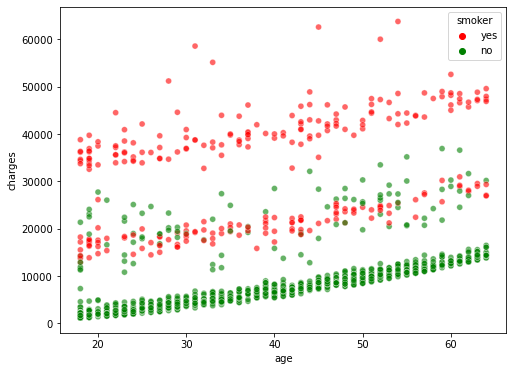

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age,df.charges,hue=df.smoker,palette=['red','green'],alpha=0.6)
plt.show()

### Visually there is a difference in charges of smokers and non smokers

In [37]:
#t-test
Ho = "Charges of smoker and non-smoker are the same" #Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same" #Alternate Hypothesis

x = np.array(df[df.smoker=='yes'].charges)
y = np.array(df[df.smoker=='no'].charges)

t,p_value = stats.ttest_ind(x,y,axis=0)

if p_value < 0.05:  #significance level=0.05
    print(f'{Ha} as p value {p_value} is < 0.05')
else:
    print(f'{Ho} as p value {p_value} is > 0.05')

Charges of smoker and non-smoker are not the same as p value 8.271435842179102e-283 is < 0.05


C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


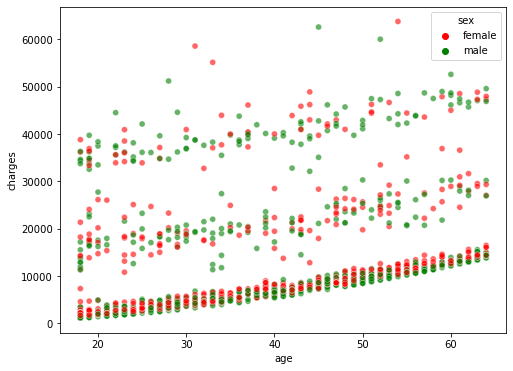

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age,df.charges,hue=df.sex,palette=['red','green'],alpha=0.6)
plt.show()

In [41]:
Ho = "Charges of male and female are the same" #Null Hypothesis
Ha = "Charges of male and female are not the same" #Alternate Hypothesis

x = np.array(df[df.sex=='male'].charges)
y = np.array(df[df.sex=='female'].charges)

t,p_value = stats.ttest_ind(x,y,axis=0)

if p_value < 0.05:  #significance level=0.05
    print(f'{Ha} as p value {p_value} is < 0.05')
else:
    print(f'{Ho} as p value {p_value} is > 0.05')

Charges of male and female are not the same as p value 0.03613272100592976 is < 0.05


In [42]:
Ho = "BMI of male and female are the same" #Null Hypothesis
Ha = "BMI of male and female are not the same" #Alternate Hypothesis

x = np.array(df[df.sex=='male'].bmi)
y = np.array(df[df.sex=='female'].bmi)

t,p_value = stats.ttest_ind(x,y,axis=0)

if p_value < 0.05:  #significance level=0.05
    print(f'{Ha} as p value {p_value} is < 0.05')
else:
    print(f'{Ho} as p value {p_value} is > 0.05')

BMI of male and female are the same as p value 0.08997637178984932 is > 0.05


In [43]:
#Chi_Square test to check if smoking habits are different for male and female
Ho = "Gender has no effect on smoking habits"
Ha = "Gender has effect on smoking habits"

crosstab = pd.crosstab(df['sex'],df['smoker'])

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  #significance level=0.05
    print(f'{Ha} as p value {p_value} is < 0.05')
else:
    print(f'{Ho} as p value {p_value} is > 0.05')

Gender has effect on smoking habits as p value 0.006548143503580696 is < 0.05


In [45]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


No. of children has no effect on bmi as the p_value (0.716) > 0.05
